In [5]:

# ENDOMETRIOSIS UNDERDIAGNOSIS ANALYSIS


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
#Dataset has not been included

print(df.shape)
df.head()



(10000, 7)


,Age,Menstrual_Irregularity,Chronic_Pain_Level,Hormone_Level_Abnormality,Infertility,BMI,Diagnosis
0,24,1,8.361531,0,0,19.451314,0
1,37,1,4.995508,0,0,22.388436,0
2,46,1,3.363996,1,0,21.320443,0
3,32,1,5.246037,0,0,20.177715,1
4,28,1,3.898932,1,0,23.538103,1


In [7]:
# Numeric
num_cols = ["Age", "Chronic_Pain_Level", "BMI"]
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Binary
bin_cols = [
    "Menstrual_Irregularity",
    "Hormone_Level_Abnormality",
    "Infertility",
    "Diagnosis"
]

for col in bin_cols:
    df[col] = df[col].astype(int)

df.isnull().sum()



,0
Age,0
Menstrual_Irregularity,0
Chronic_Pain_Level,0
Hormone_Level_Abnormality,0
Infertility,0
BMI,0
Diagnosis,0


In [8]:
diagnosis_rate = df["Diagnosis"].mean()
print(f"Diagnosis rate in dataset: {diagnosis_rate:.2%}")



Diagnosis rate in dataset: 40.79%


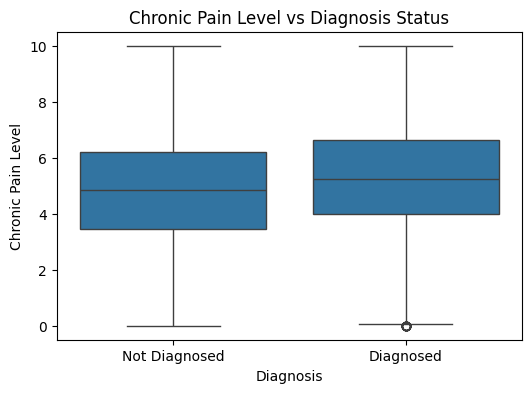

In [10]:
plt.figure(figsize=(6,4))
sns.boxplot(
    data=df,
    x="Diagnosis",
    y="Chronic_Pain_Level"
)
plt.xticks([0,1], ["Not Diagnosed", "Diagnosed"])
plt.title("Chronic Pain Level vs Diagnosis Status")
plt.ylabel("Chronic Pain Level")
plt.show()



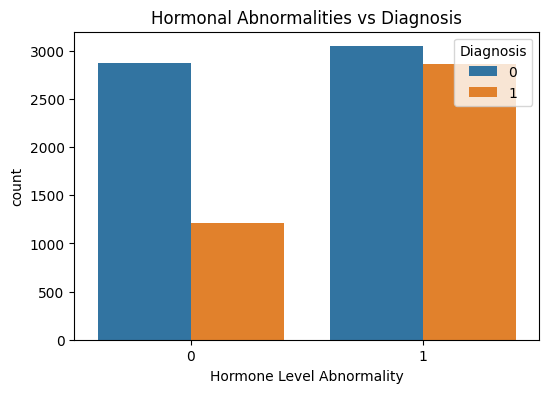

In [12]:
plt.figure(figsize=(6,4))
sns.countplot(
    data=df,
    x="Hormone_Level_Abnormality",
    hue="Diagnosis"
)
plt.xlabel("Hormone Level Abnormality")
plt.title("Hormonal Abnormalities vs Diagnosis")
plt.show()



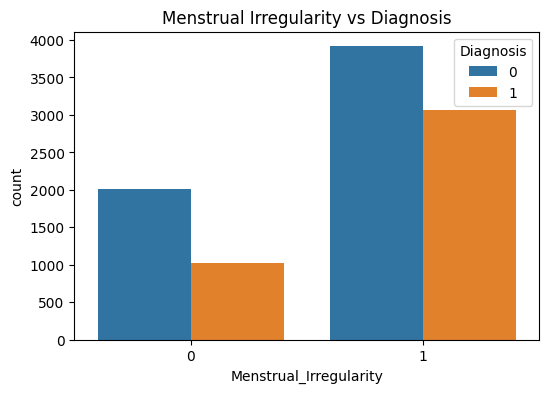

In [13]:
plt.figure(figsize=(6,4))
sns.countplot(
    data=df,
    x="Menstrual_Irregularity",
    hue="Diagnosis"
)
plt.title("Menstrual Irregularity vs Diagnosis")
plt.show()



In [14]:
# High symptom burden
pain_threshold = df["Chronic_Pain_Level"].quantile(0.75)

df["high_symptom_undiagnosed"] = (
    (df["Chronic_Pain_Level"] >= pain_threshold) &
    (df["Diagnosis"] == 0)
).astype(int)

df["high_symptom_undiagnosed"].value_counts(normalize=True)


,proportion
high_symptom_undiagnosed,
0,0.868
1,0.132


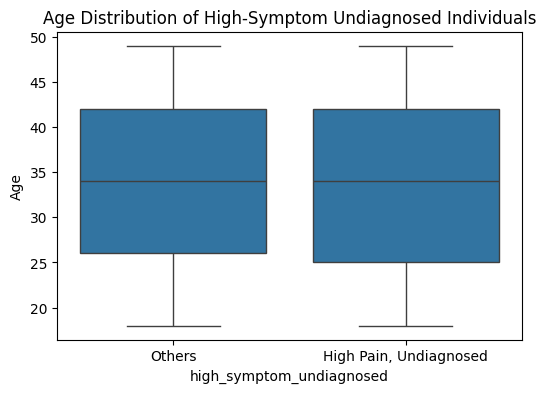

In [15]:
plt.figure(figsize=(6,4))
sns.boxplot(
    data=df,
    x="high_symptom_undiagnosed",
    y="Age"
)
plt.xticks([0,1], ["Others", "High Pain, Undiagnosed"])
plt.title("Age Distribution of High-Symptom Undiagnosed Individuals")
plt.show()



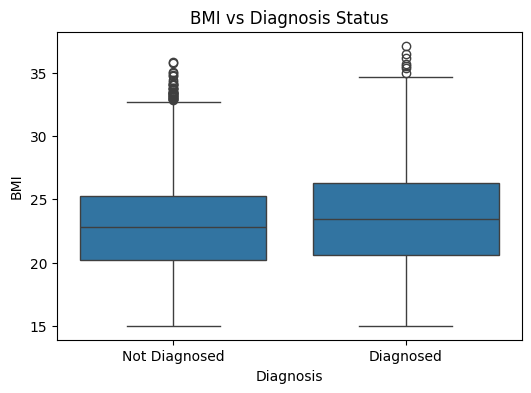

In [16]:
plt.figure(figsize=(6,4))
sns.boxplot(
    data=df,
    x="Diagnosis",
    y="BMI"
)
plt.xticks([0,1], ["Not Diagnosed", "Diagnosed"])
plt.title("BMI vs Diagnosis Status")
plt.show()



In [ ]:
print("""
KEY INSIGHTS:
1. A substantial fraction of individuals report high chronic pain without formal diagnosis.
2. Hormonal abnormalities and menstrual irregularities are present even among undiagnosed cases.
3. Symptom severity alone does not guarantee clinical recognition.
4. Underdiagnosis appears to be driven by systemic and diagnostic limitations rather than lack of symptoms.
""")
